In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from spectral_analysis_utils import construct_lazy_randomM_walk_transmat, getDFT_evals, theoretical_circulant_perturbation, discrete_fourier_transform, constructTransmat

%matplotlib inline
%load_ext autoreload
%autoreload 2

/var/folders/6b/58_qt7d91c96pg2b8nn3nd2m0000gn/T/ipykernel_99087/1065551234.py:121: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


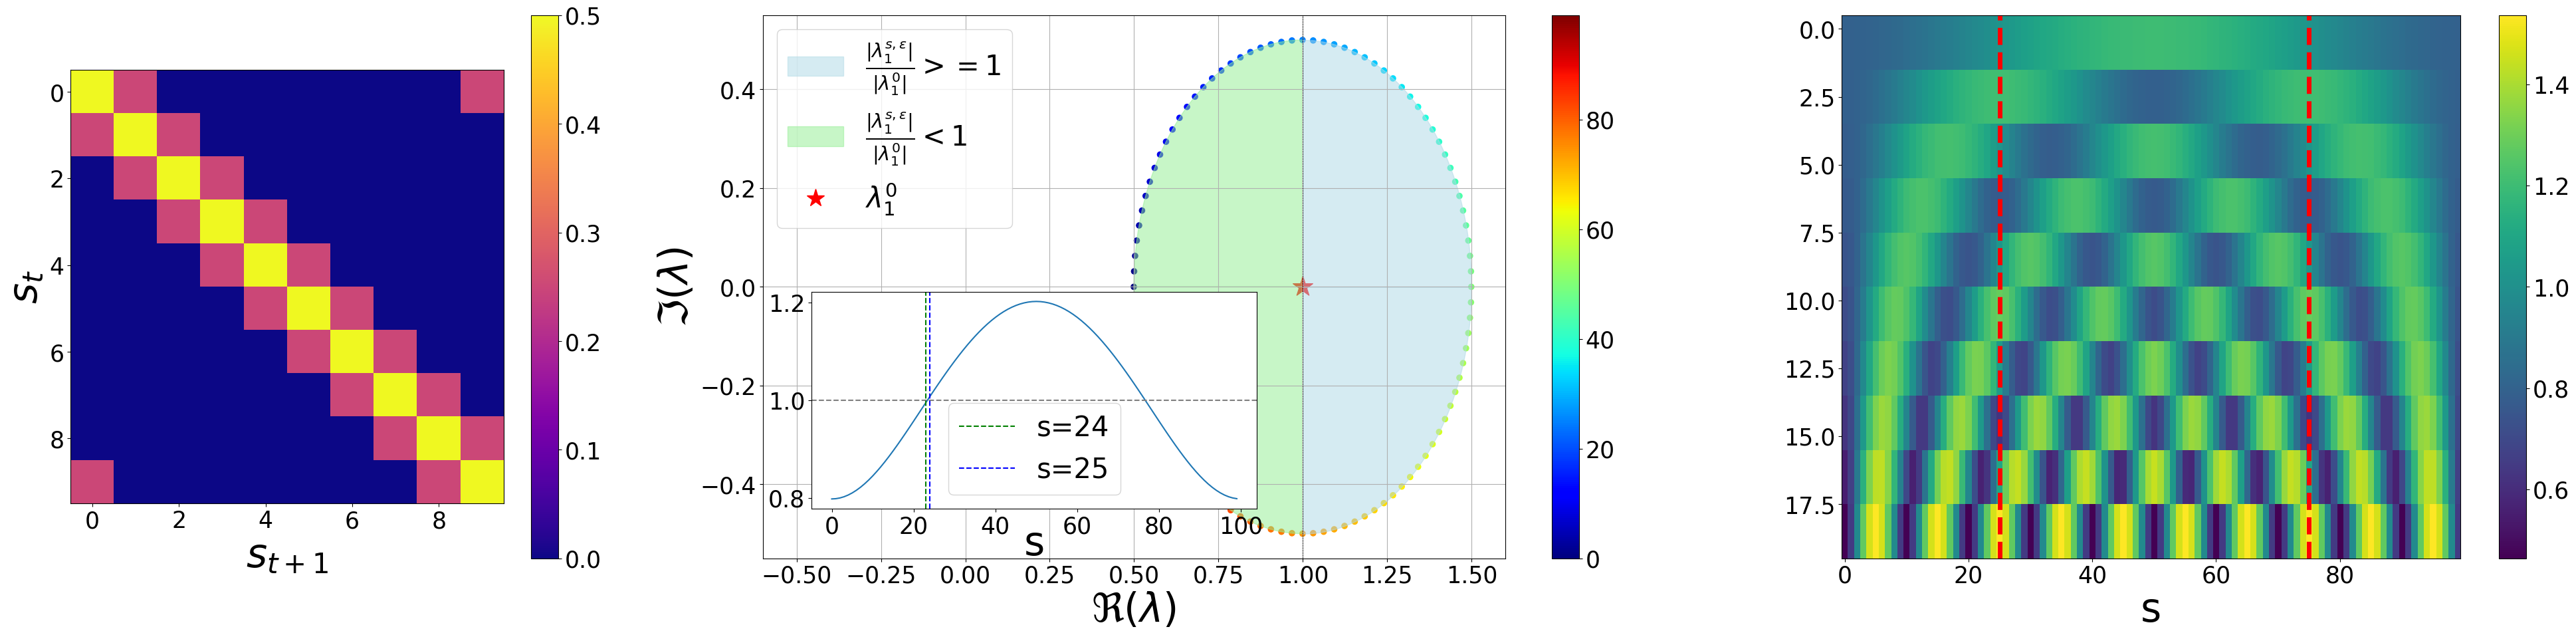

In [2]:

plt.rc('font', size=25)

fig = plt.figure(figsize=(40, 10))
fig.subplots_adjust(wspace=0.1, hspace=0.1)

gs = fig.add_gridspec(1, 3, width_ratios=[7, 12, 10])

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])

# panel a
N = 10
T = construct_lazy_randomM_walk_transmat(N)

im1 = ax1.imshow(T, cmap="plasma")
ax1.set_xlabel(r"$s_{t+1}$", fontsize="xx-large")
ax1.set_ylabel(r"$s_{t}$", fontsize="xx-large")

pos = ax1.get_position()

cbar = fig.colorbar(im1, ax=ax1)

cbar.ax.set_position([pos.x1-0.04, pos.y0, 0.02, pos.height])
# cbar.set_label(r"$P(s_{t+1}|s_{t})$", fontsize="xx-large")

# panel b

N = 100
T = construct_lazy_randomM_walk_transmat(N)
evals = getDFT_evals(T)
principal_eval = evals[1]

epsilon = -0.5
perturbed_evals = principal_eval + epsilon * np.exp(-1j * 2 * np.pi / N * np.arange(N))

ax2.scatter(np.real(principal_eval), np.imag(principal_eval), s=500, c="red", marker="*")

im2 = ax2.scatter(np.real(perturbed_evals), np.imag(perturbed_evals), c=np.arange(N), s=35, cmap="jet")

ax2.axvline(np.real(principal_eval), color="k", linestyle="--", linewidth=0.5)

ax2.set_xlim(-0.6, 1.6)

pos = ax2.get_position()

cbar = fig.colorbar(im2, ax=ax2)
# cbar.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
# cbar.set_ticklabels([0, 20, 40, 60, 80, 100])

cbar.ax.set_position([pos.x1-0.05, pos.y0, 0.02, pos.height])
# cbar.set_label("s", fontsize="xx-large")

ax2.set_aspect("auto")
ax2.grid()

circle = plt.Circle((np.real(principal_eval), 0), np.abs(epsilon), color='white', fill=False, linestyle='--', alpha=0.1)
ax2.add_artist(circle)

t = np.linspace(0, 2 * np.pi, 1000)
inner_circle_x = epsilon * np.cos(t) + np.real(principal_eval)
inner_circle_y = epsilon * np.sin(t)

ax2.fill_between(inner_circle_x, inner_circle_y, color='lightblue', alpha=0.5, where=(inner_circle_x >= np.real(principal_eval)))
ax2.fill_between(inner_circle_x, inner_circle_y, color='lightgreen', alpha=0.5, where=(inner_circle_x <= np.real(principal_eval)))

blue_patch = mpatches.Patch(color='lightblue', alpha=0.5, label=r"$\frac{|\lambda_{1}^{s, \epsilon}|}{|\lambda^{0}_{1}|} >=1$")
red_patch = mpatches.Patch(color='lightgreen', alpha=0.5, label=r"$\frac{|\lambda_{1}^{s, \epsilon}|}{|\lambda^{0}_{1}|} <1$")
star_marker,  = plt.plot([], [], marker='*', color='red', markersize=20, linestyle='', label=r'$\lambda^{0}_{1}$')

ax2.legend(handles=[blue_patch, red_patch, star_marker], fontsize="large", loc="upper left")

ax2.set_xlabel(r"$\Re(\lambda)$", fontsize="xx-large")
ax2.set_ylabel(r"$\Im(\lambda)$", fontsize="xx-large")

# panel b inset

N = 100
var = 5

epsilon = -0.2

T = constructTransmat(N, 1, var)

evals_original = discrete_fourier_transform(T[0])

inds = np.argsort(np.abs(evals_original))[::-1]

evals_perturbed_ratio_all = np.zeros((N, 20))
for i in range(N):
    evals_perturbed = evals_original + theoretical_circulant_perturbation(N, i, epsilon)
    evals_perturbed_ratio_all[i] = (np.abs(evals_perturbed) / np.abs(evals_original))[inds][1:21]

ax_inset = inset_axes(ax2, width='60%', height='40%', loc="lower left", 
                      bbox_to_anchor=(0.05, 0.07, 1, 1), bbox_transform=ax2.transAxes)
ax_inset.plot(np.arange(100), evals_perturbed_ratio_all[:, 1])

ax_inset.axhline(1.0, color="gray", linestyle="--")
ax_inset.axvline(23.0, color="green", linestyle="--", label="s=24")
ax_inset.axvline(24.0, color="blue", linestyle="--", label="s=25")

ax_inset.legend(fontsize="large", loc="lower center")
# ax_inset.spines['top'].set_visible(False)
# ax_inset.spines['right'].set_visible(False)
# ax_inset.set_facecolor('none')

ax_inset.set_xlabel("s", fontsize="xx-large", labelpad=-15)
# ax_inset.set_ylabel(r"$|\lambda_{1}^{s, \epsilon}| / |\lambda^{0}_{1}|$", fontsize="xx-large")

im3 = ax3.imshow((evals_perturbed_ratio_all.T))
cbar = fig.colorbar(im3, ax=ax3)
cbar.ax.set_position([pos.x1-0.05, pos.y0, 0.02, pos.height / 100])
ax3.axvline(25, color="r", linestyle="--", linewidth=5.0)
ax3.axvline(75, color="r", linestyle="--", linewidth=5.0)

ax3.set_xlabel("s", fontsize="xx-large")

ax3.set_aspect(ax2.get_aspect())


plt.tight_layout()

fig.savefig("../PaperFigs/figureS7.pdf", bbox_inches='tight')